**A1.3 Regresión lineal múltiple**

**1.** Se importa la libreria pandas, se carga el archivo "A1.3 NASA.csv". Posterior a esto se imprimen las dimensiones del data frame, así como las primeras 15 filas del archivo.  

In [3]:
import pandas as pd
data=pd.read_csv('A1.3 NASA.csv')
print("Dimensiones del data frame:",data.shape)
data.head(15)

Dimensiones del data frame: (1503, 6)


,frecuencia,angulo,longitud,velocidad,espesor,presion
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


**2.** Se separa el data frame en datos de entrenamiento y de prueba para entrenar el modelo. En este caso se utiliza una proporción 70/30, siendo 70% de entrenamiento y 30% de prueba. Esta partición se hace de manera aleatoria y el final se confirma que ambas parten sumen el 100% de los datos.

In [5]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3,random_state=42)
total=train.shape[0]+test.shape[0]

print("Observaciones datos de entrenamiento:",train.shape)
print("Observaciones datos de prueba:",test.shape)
print("Cantidad de observaciones totales:",total)

Observaciones datos de entrenamiento: (1052, 6)
Observaciones datos de prueba: (451, 6)
Cantidad de observaciones totales: 1503


**3.** Se definen las variables independientes: frecuencia, ángulo, longitud, velocidad y espesor. La variable dependiente es la sexta del archivo, siendo la presión. Luego se entrena el modelo de regresión lineal múltiple para que las 5 variables independientes intenten predecir la dependiente. 

Se imprime un resumen del modelo, así como los 'valores p' con el atributo pvalues.

In [7]:
import statsmodels.api as sm
x=data[['frecuencia','angulo','longitud','velocidad','espesor']]
y=data['presion']
x=sm.add_constant(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
modelo=sm.OLS(y_train,x_train).fit()

print(modelo.summary())
print("p values: ",modelo.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.38e-164
Time:                        12:36:56   Log-Likelihood:                -3138.0
No. Observations:                1052   AIC:                             6288.
Df Residuals:                    1046   BIC:                             6318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4778      0.651    203.367      0.0

**4.** Considero que sí existe al menos una variable significativa en el modelo, esto con base a la métrica del valor p. Si una variable tiene su valor p menor a 0.05 la relación con la variable "presión" es significativa. Basado en esta métrica, la frecuencia, el angulo, la longitud, la velocidad y el espesor tienen asociación lineal significativa con la salida.

La variable más importante del modelo considero que es el "espesor", esto ya que tiene el coeficiente absoluto más alto. Esta métrica es la tomada en consideración puesto que indica el impacto relativo de cada variable en la predicción de presión.

**5.** Se calcula el RSE, así como la R^2 del modelo para los datos de entrenamiento y los de validación. 

In [10]:
import numpy
from sklearn.metrics import r2_score,mean_squared_error

RSE_train=numpy.sqrt(modelo.scale)
R2_train=modelo.rsquared

y_test_pred=modelo.predict(x_test)

RSE_test=numpy.sqrt(mean_squared_error(y_test,y_test_pred))
R2_test=r2_score(y_test,y_test_pred)

print("Métricas del modelo")
print("RSE entrenamiento:",RSE_train)
print("R2 entrenamiento:",R2_train)
print("RSE validación:",RSE_test)
print("R2 validación:",R2_test)

Métricas del modelo
RSE entrenamiento: 4.791436345798008
R2 entrenamiento: 0.5214416938715567
RSE validación: 4.867017391586264
R2 validación: 0.4982726587937768


**6.** Se genera una gráfica de dispersión con los valores de la presión, junto con el valor estimado de "y" de acuerdo al modelo propuesto. 

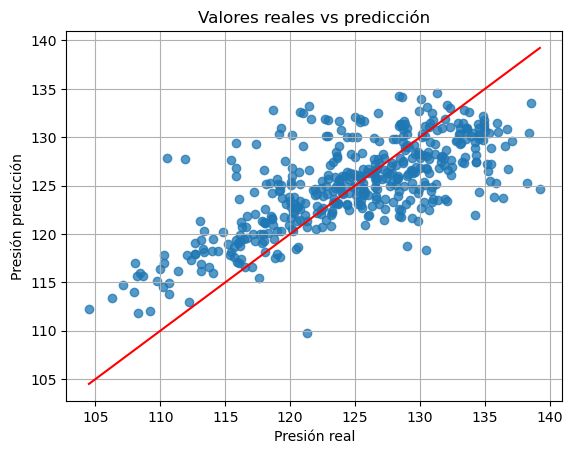

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test,y_test_pred,alpha=0.75)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r')
plt.xlabel("Presión real")
plt.ylabel("Presión predicción")
plt.title("Valores reales vs predicción")
plt.grid()
plt.show()

**Comentario sobre los resultados obtenidos**:En esta gráfica de dispersión se comparan los valores reales con los valores de la predicción. Así mismo, en esta misma gráfica se incluye una recta roja la cual esta a 45° y visualmente se puede ver que representa el modelo perfecto, es decir, predicciones idénticas a los reales.

Los puntos se agrupan de manera significativa a la línea, sin embargo si hay algunos más dispersos a esta. Con esto se podría decir que el modelo hasta cierto punto tiene un buen rendimiento.

**Referencias**
 - UC Irvine Machine Learning Repository. (2014, 3 marzo). UCI Machine Learning Repository. archive.ics.uci.edu. Recuperado 29 de enero de 2025, de https://archive.ics.uci.edu/dataset/291/airfoil+self+noise
   
 - NASA. (1989, julio). Airfoil Self-Noise and prediction. ntrs.nasa.gov. Recuperado 29 de enero de 2025, de https://ntrs.nasa.gov/api/citations/19890016302/downloads/19890016302.pdf